In [11]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [12]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/b_boehm'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

nPoints = 10000
nClusters = 5
#t = pd.read_csv('../sample_data/data_10_10000.dat', sep=' ', header=None, names=['x', 'y'])
t = pd.read_csv(f'../sample_data/data_{nClusters:.0f}_{nPoints:.0f}.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [15]:
# 10 clusters, 100000 data points, coreThreshold = 2000
# -> coreThreshold = min { 10000, nPoints / (nClusters * 5) }

df = runDbscan(t, min(10000, int(nPoints / (nClusters * 5))), 1.4)

In [16]:
clusters = df.groupby('cluster_id')

[]

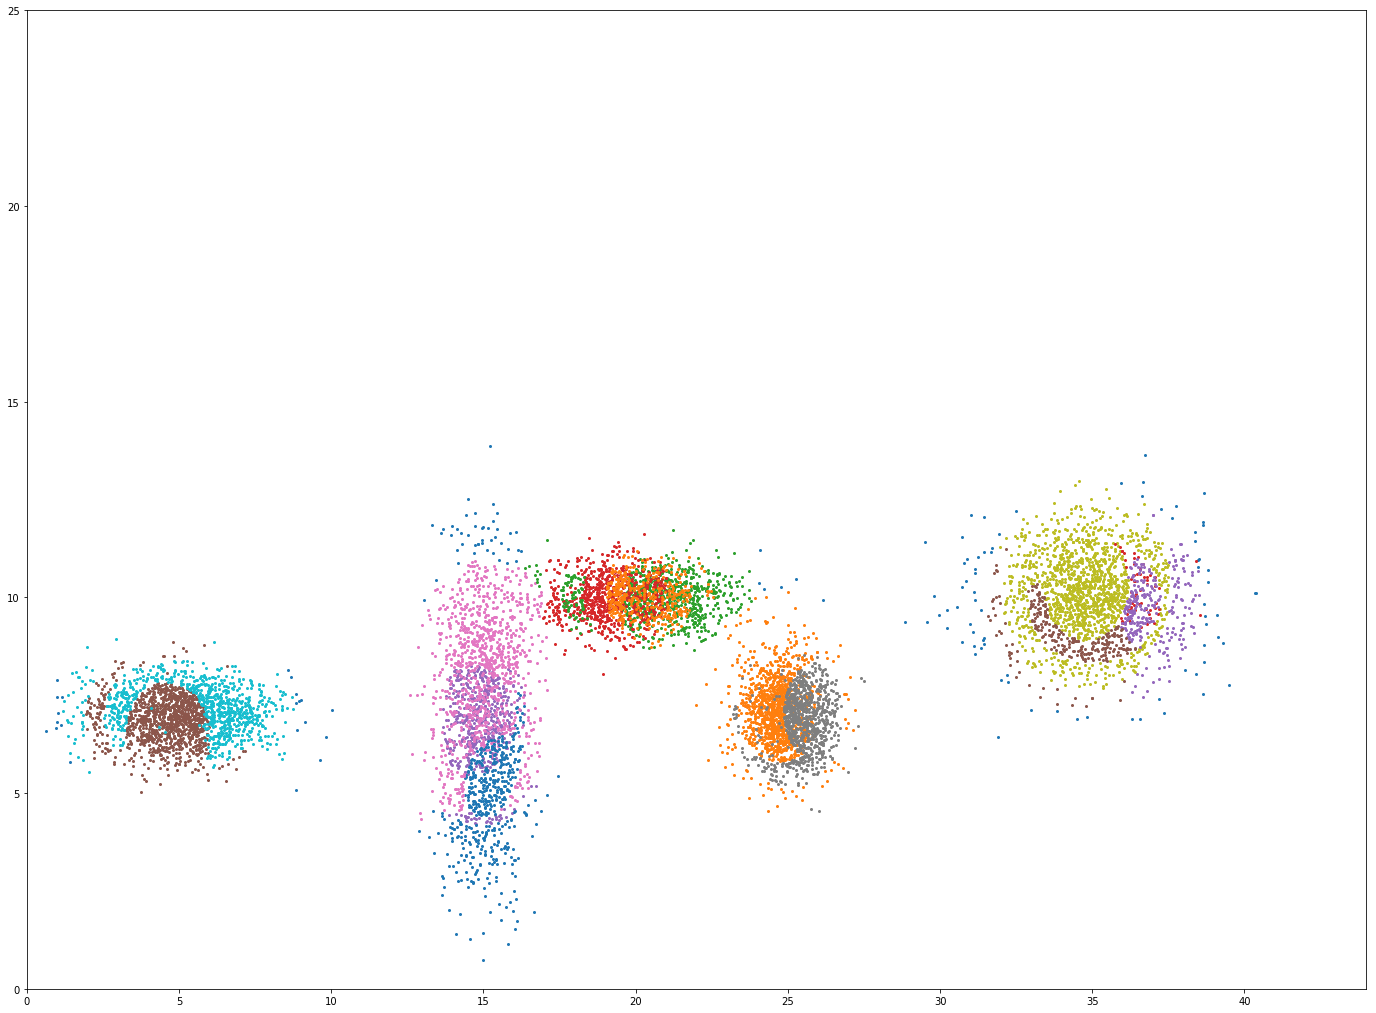

In [17]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
    plt.xlim(0,44)
    plt.ylim(0,25)
plt.plot()

In [10]:
set(df['cluster_id'])

{0, 1, 2, 3, 4, 7, 9, 10, 24}